In [1]:
!pip install scikit-learn
!pip install --upgrade scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
!pip install astroNN

In [4]:
from astroNN.datasets import load_galaxy10sdss

In [5]:

images, labels = load_galaxy10sdss()
label = utils.to_categorical(labels, num_classes=10)

C:\Users\AADI\.astroNN\datasets\Galaxy10.h5 was found!


In [6]:
label = label.astype(np.float32)
images = images.astype(np.float32)

In [7]:
print (labels)
print (label.shape[0])

[2 2 4 ... 2 9 2]
21785


In [8]:
train_x,test_x=train_test_split(np.arange(labels.shape[0]),test_size=0.1)
train_images,train_labels,test_images,test_labels=images[train_x],label[train_x],images[test_x],label[test_x]

In [9]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

19606
2179
19606


In [10]:
imageLabel = ["Disk, Face-on, No Spiral", "Smooth, Completely round", "Smooth, in-between round", "Smooth, Cigar shaped",
              "Disk, Edge-on, Rounded Bulge", "Disk, Edge-on, Boxy Bulge", "Disk, Edge-on, No Bulge", "Disk, Face-on, Tight Spiral", "Disk, Face-on, Medium Spiral",
              "Disk, Face-on, Loose Spiral"]

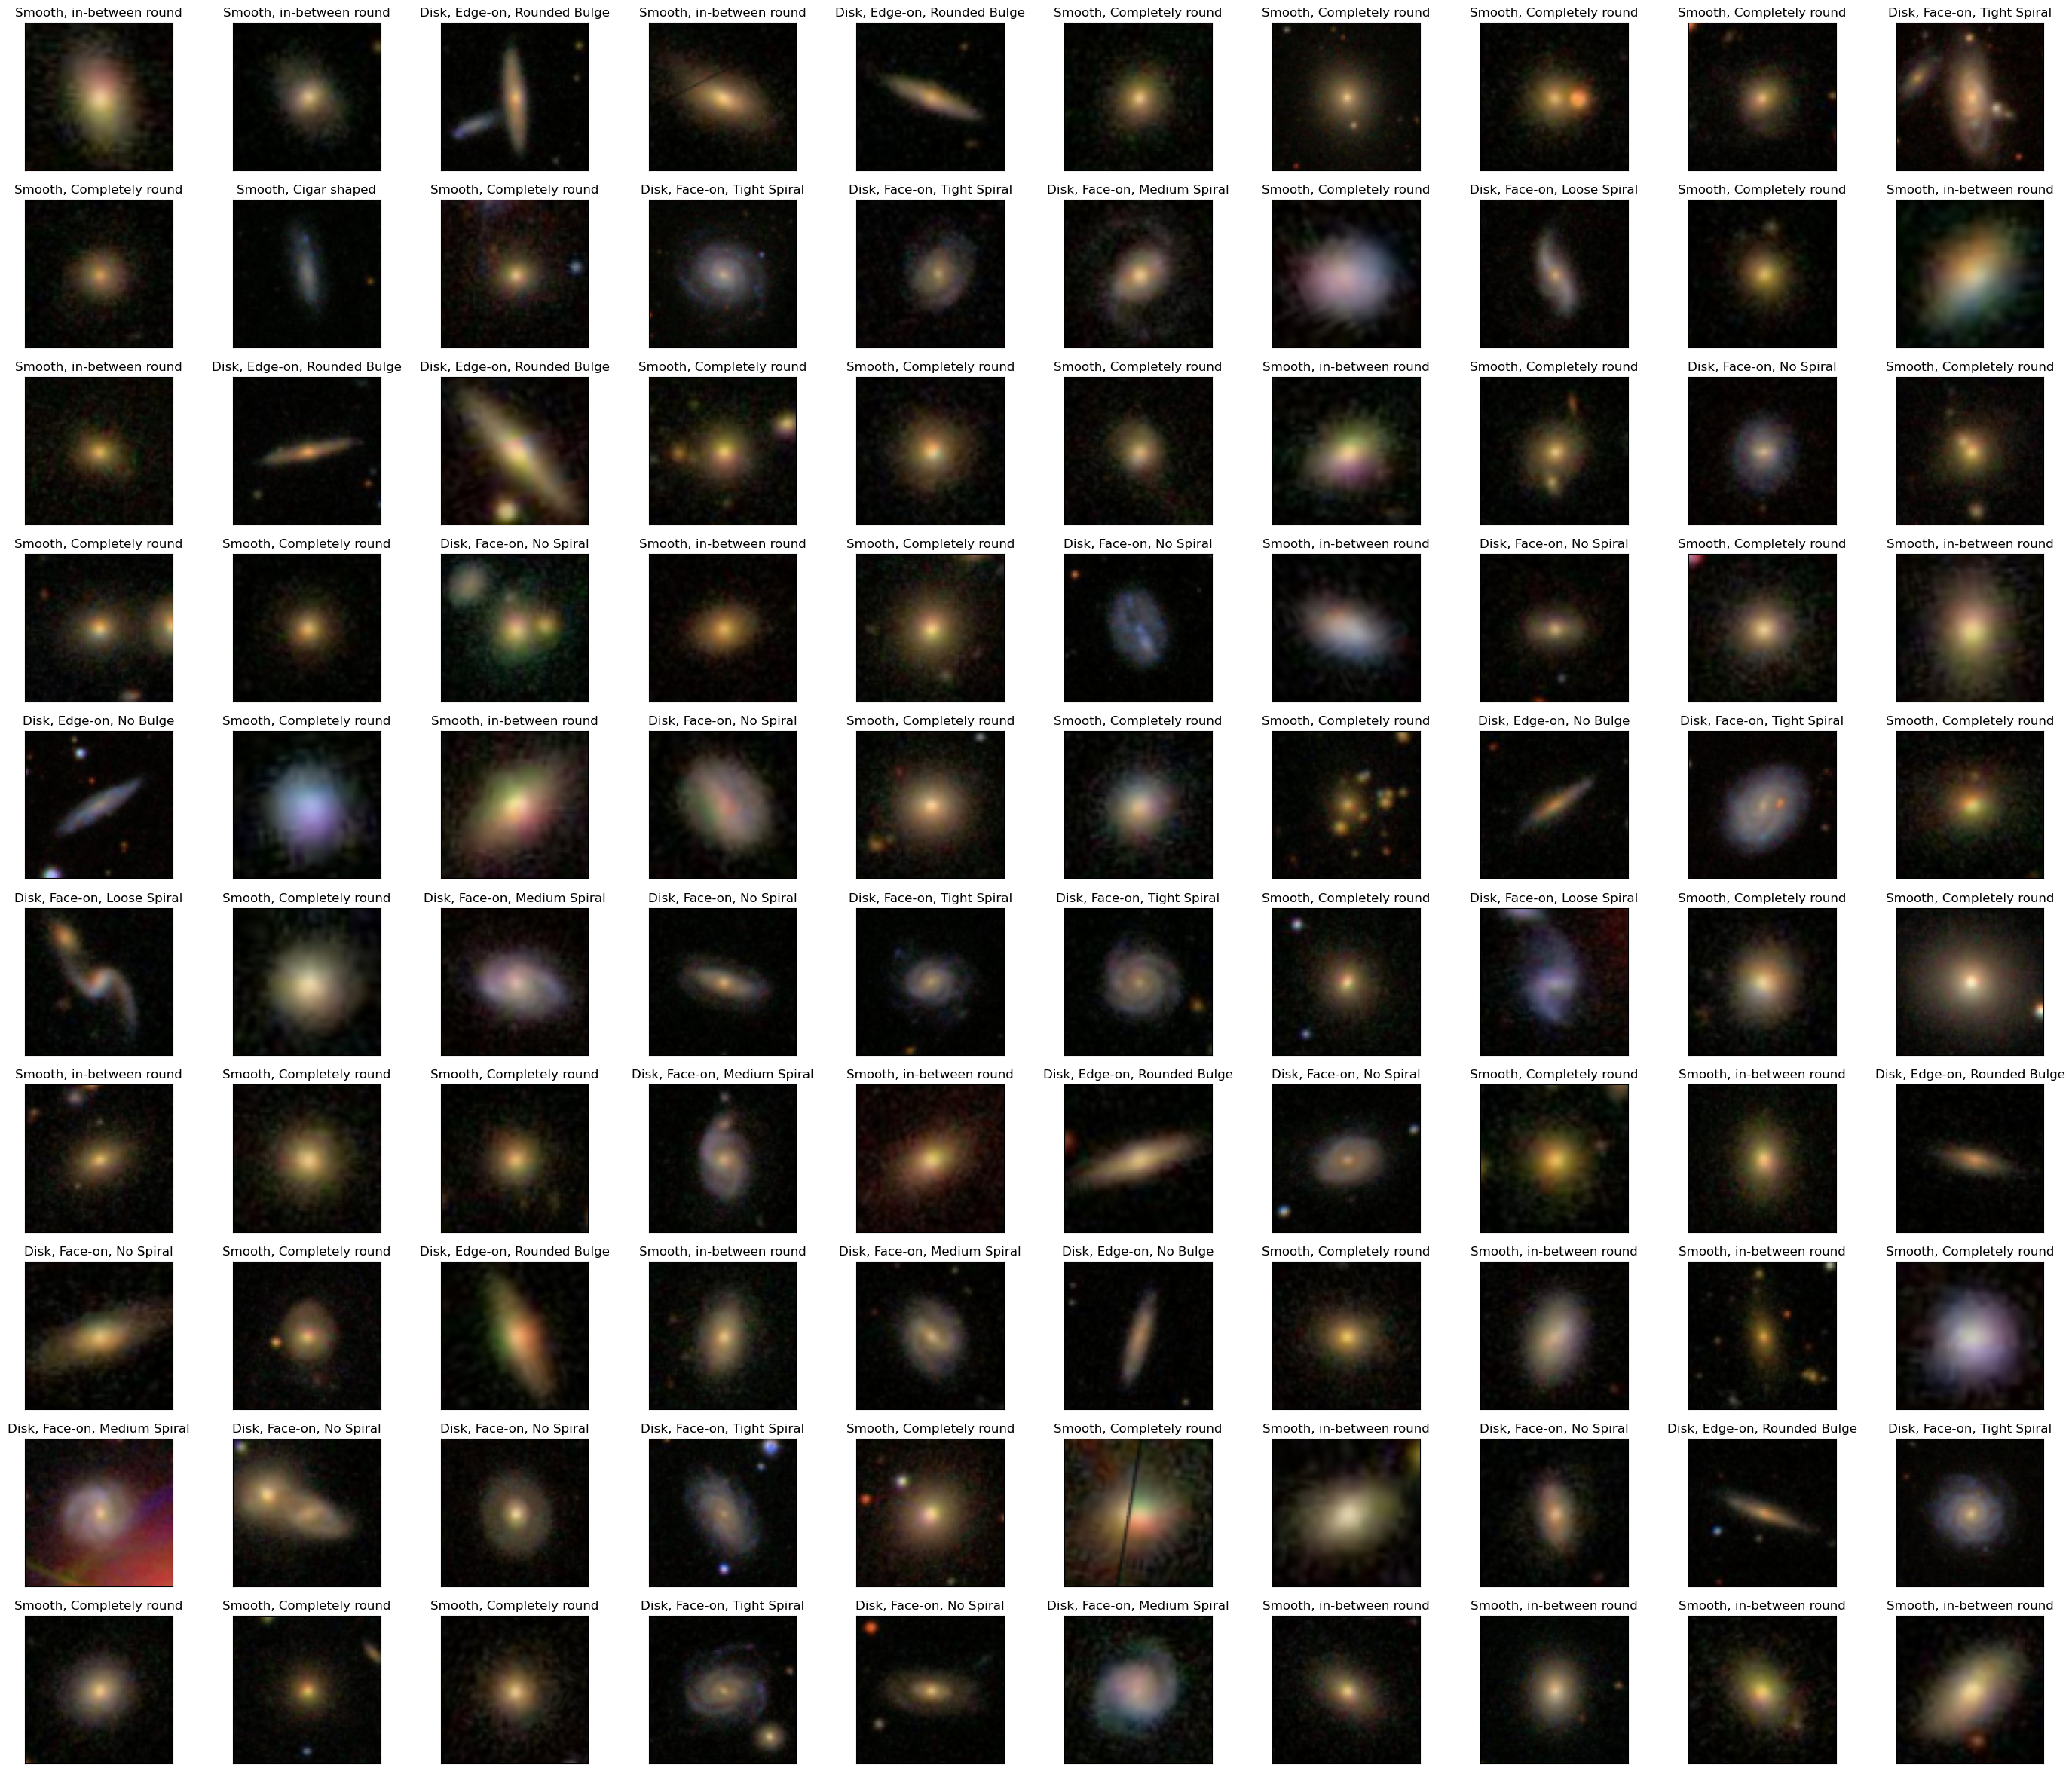

In [11]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (35,30))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()


2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)


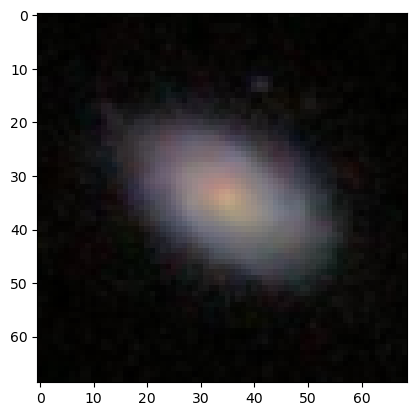

In [12]:
plt.imshow(train_images[0].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)

In [13]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

# Value normalization
X_train  = X_train/255
X_test  = X_test/255


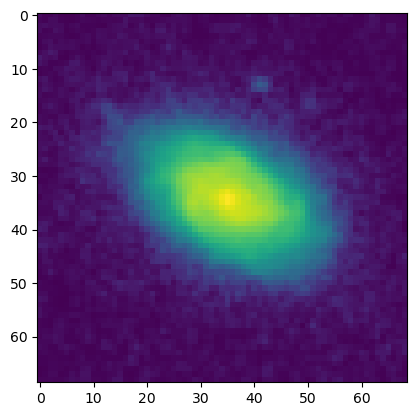

In [14]:
plt.imshow(X_train[0])

In [15]:

print(np.shape(X_train))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

(19606, 69, 69)
(69, 69, 1)


In [16]:
print (X_train.shape)
print (train_labels.shape)
print (train_labels)

(19606, 69, 69, 1)
(19606, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,
                             zoom_range=0.2,
                             horizontal_flip=True,)

datagen.fit(X_train)

datagen.fit(X_test)

In [25]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='tanh', strides=(1, 1),
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(imageLabel), activation='softmax'))
model.summary()

X:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 69, 69, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 69, 69, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 17, 17, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,290 (192.54 KB)

 Trainable params: 49,290 (192.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
batch_size=64
history = model.fit(X_train, train_labels,
                    epochs=30,
                    steps_per_epoch = int(np.ceil(X_train.shape[0]/ float(64))) , batch_size=32, validation_data=(X_test, test_labels), callbacks=[es])

Epoch 1/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - acc: 0.3205 - loss: 1.7959 - val_acc: 0.5420 - val_loss: 1.2433
Epoch 2/30
305/307 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - acc: 0.4682 - loss: 1.3756

X:\anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.


307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.4685 - loss: 1.3751 - val_acc: 0.6076 - val_loss: 1.0572
Epoch 3/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.5614 - loss: 1.1775 - val_acc: 0.6728 - val_loss: 0.9044
Epoch 4/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - acc: 0.6277 - loss: 1.0425 - val_acc: 0.6719 - val_loss: 0.8747
Epoch 5/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.6578 - loss: 0.9568 - val_acc: 0.7008 - val_loss: 0.8108
Epoch 6/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - acc: 0.6718 - loss: 0.9034 - val_acc: 0.7077 - val_loss: 0.7890
Epoch 7/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - acc: 0.6881 - loss: 0.8643 - val_acc: 0.7187 - val_loss: 0.7539
Epoch 8/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - acc: 0.6880 - loss: 0.8663 - val_acc: 0.7246 - val_loss: 0.7484
Epoch 9/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - acc: 0.6955 - loss: 0.8430 - val_acc: 0.7343 - val_loss: 0.7303
Epoch 10/30
307/307 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/s

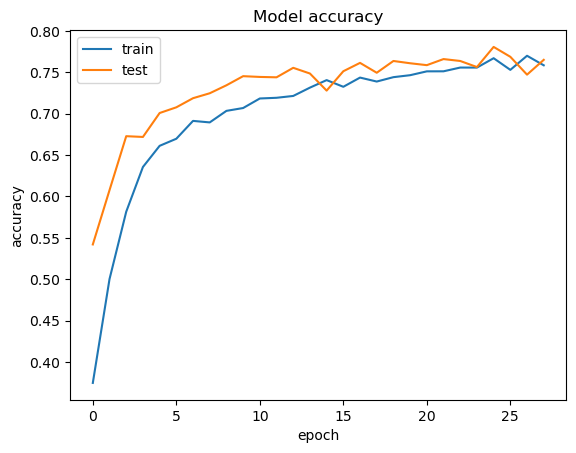

In [20]:
%matplotlib inline
fig = plt.gcf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Accuracy.png')

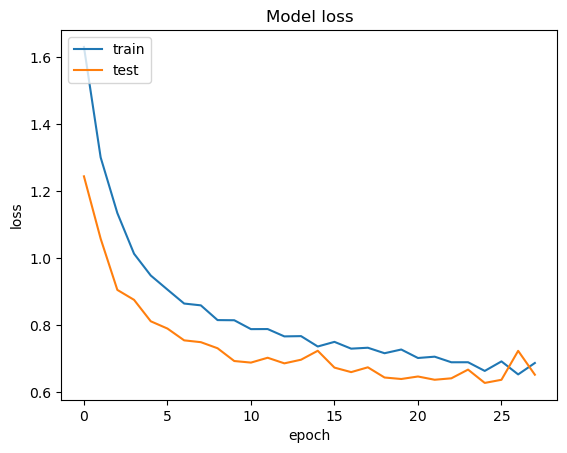

In [21]:
fig = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Loss.png')

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[[164   8  26   0   3   0   1  21  23  18]
 [ 65 686  62   0   0   0   0   3   1   0]
 [ 70  24 525   7  14   0   0   4   3   4]
 [  0   0   0   2   0   0   0   1   0   0]
 [  4   0   0  23 134   2  19   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4  13   0  41   0   0   0]
 [ 22   1   2   0   0   0   0  78  22   0]
 [ 13   0   0   0   0   0   0   7  31  14]
 [  2   0   0   0   0   0   1   1   1   6]]


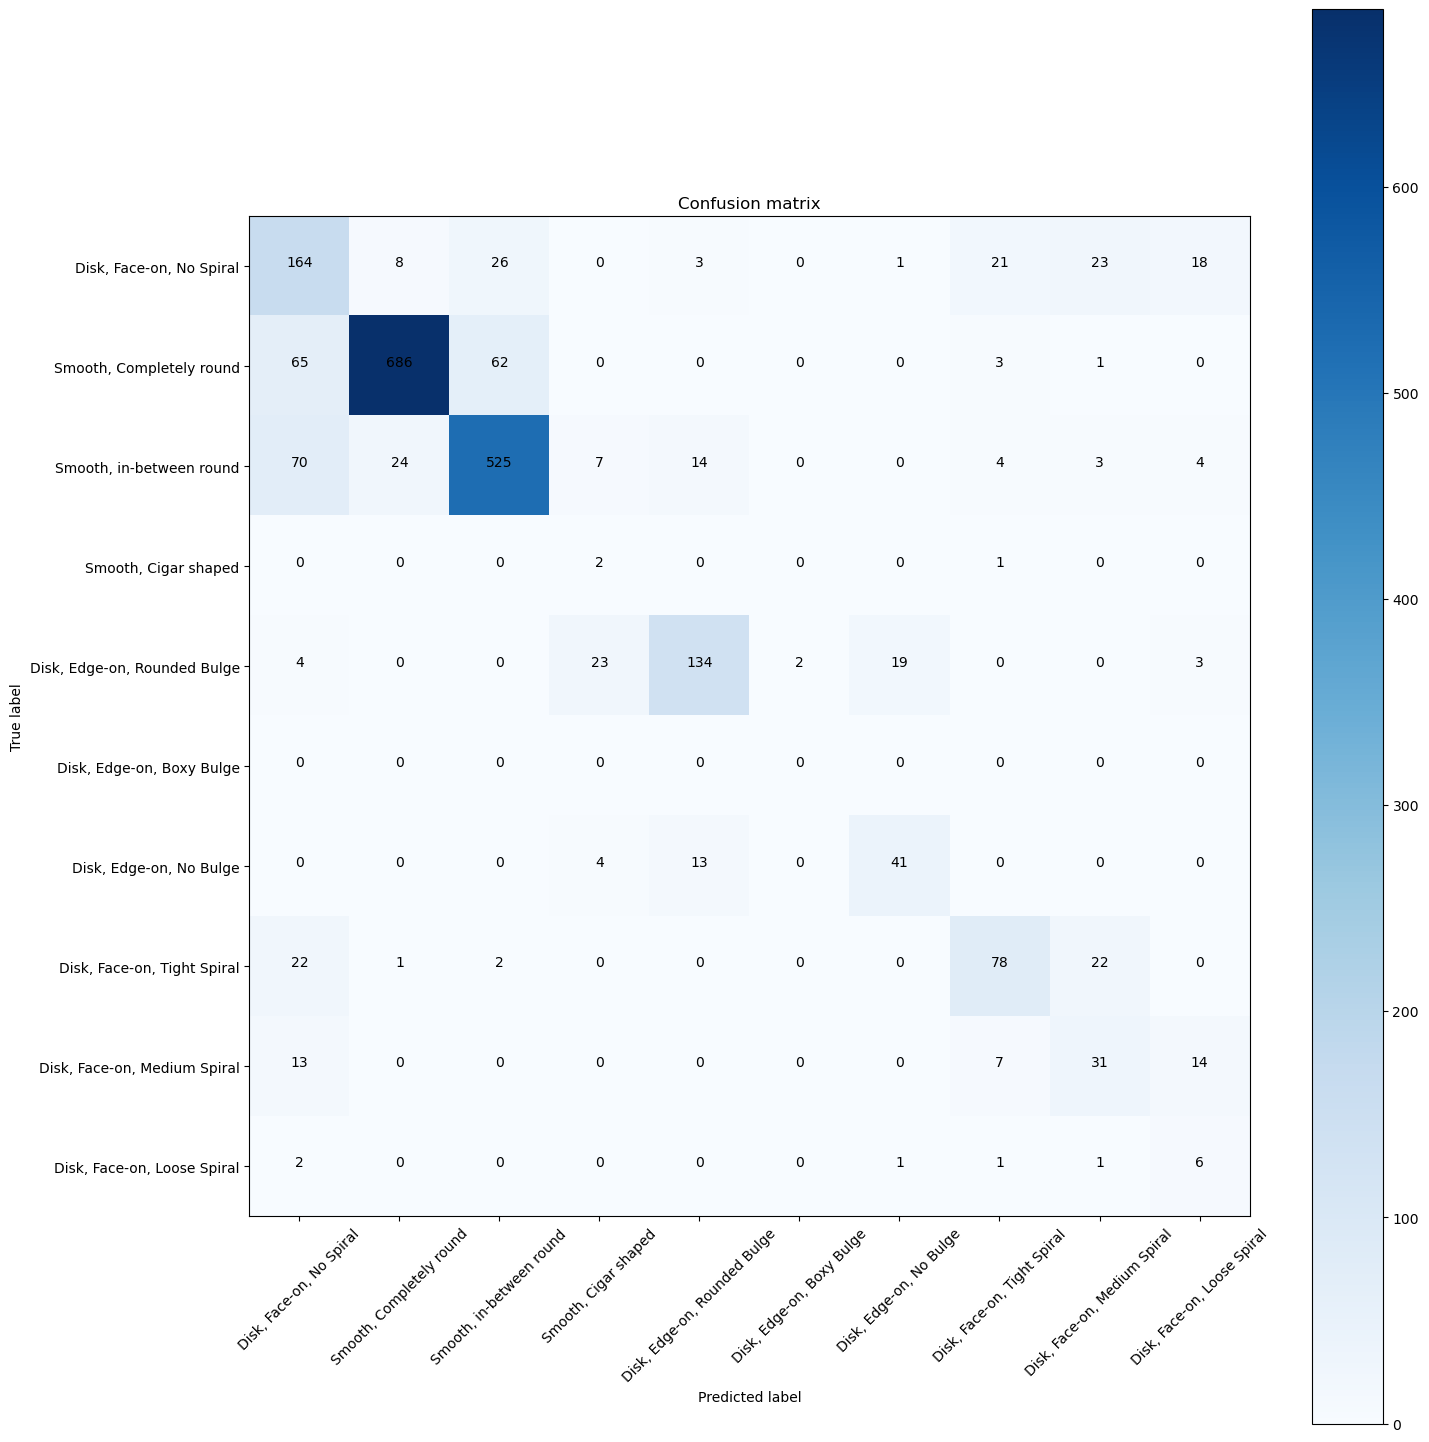

In [22]:
import itertools
def plot_confusionM(cm, class_names):
    figure = plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pred = model.predict(X_test)

pred_label = np.argmax(pred, axis=1)
actual_label = np.argmax(test_labels, axis=1)

cm = confusion_matrix(pred_label+1, actual_label+1)
print (cm)
plot_confusionM(cm, imageLabel)

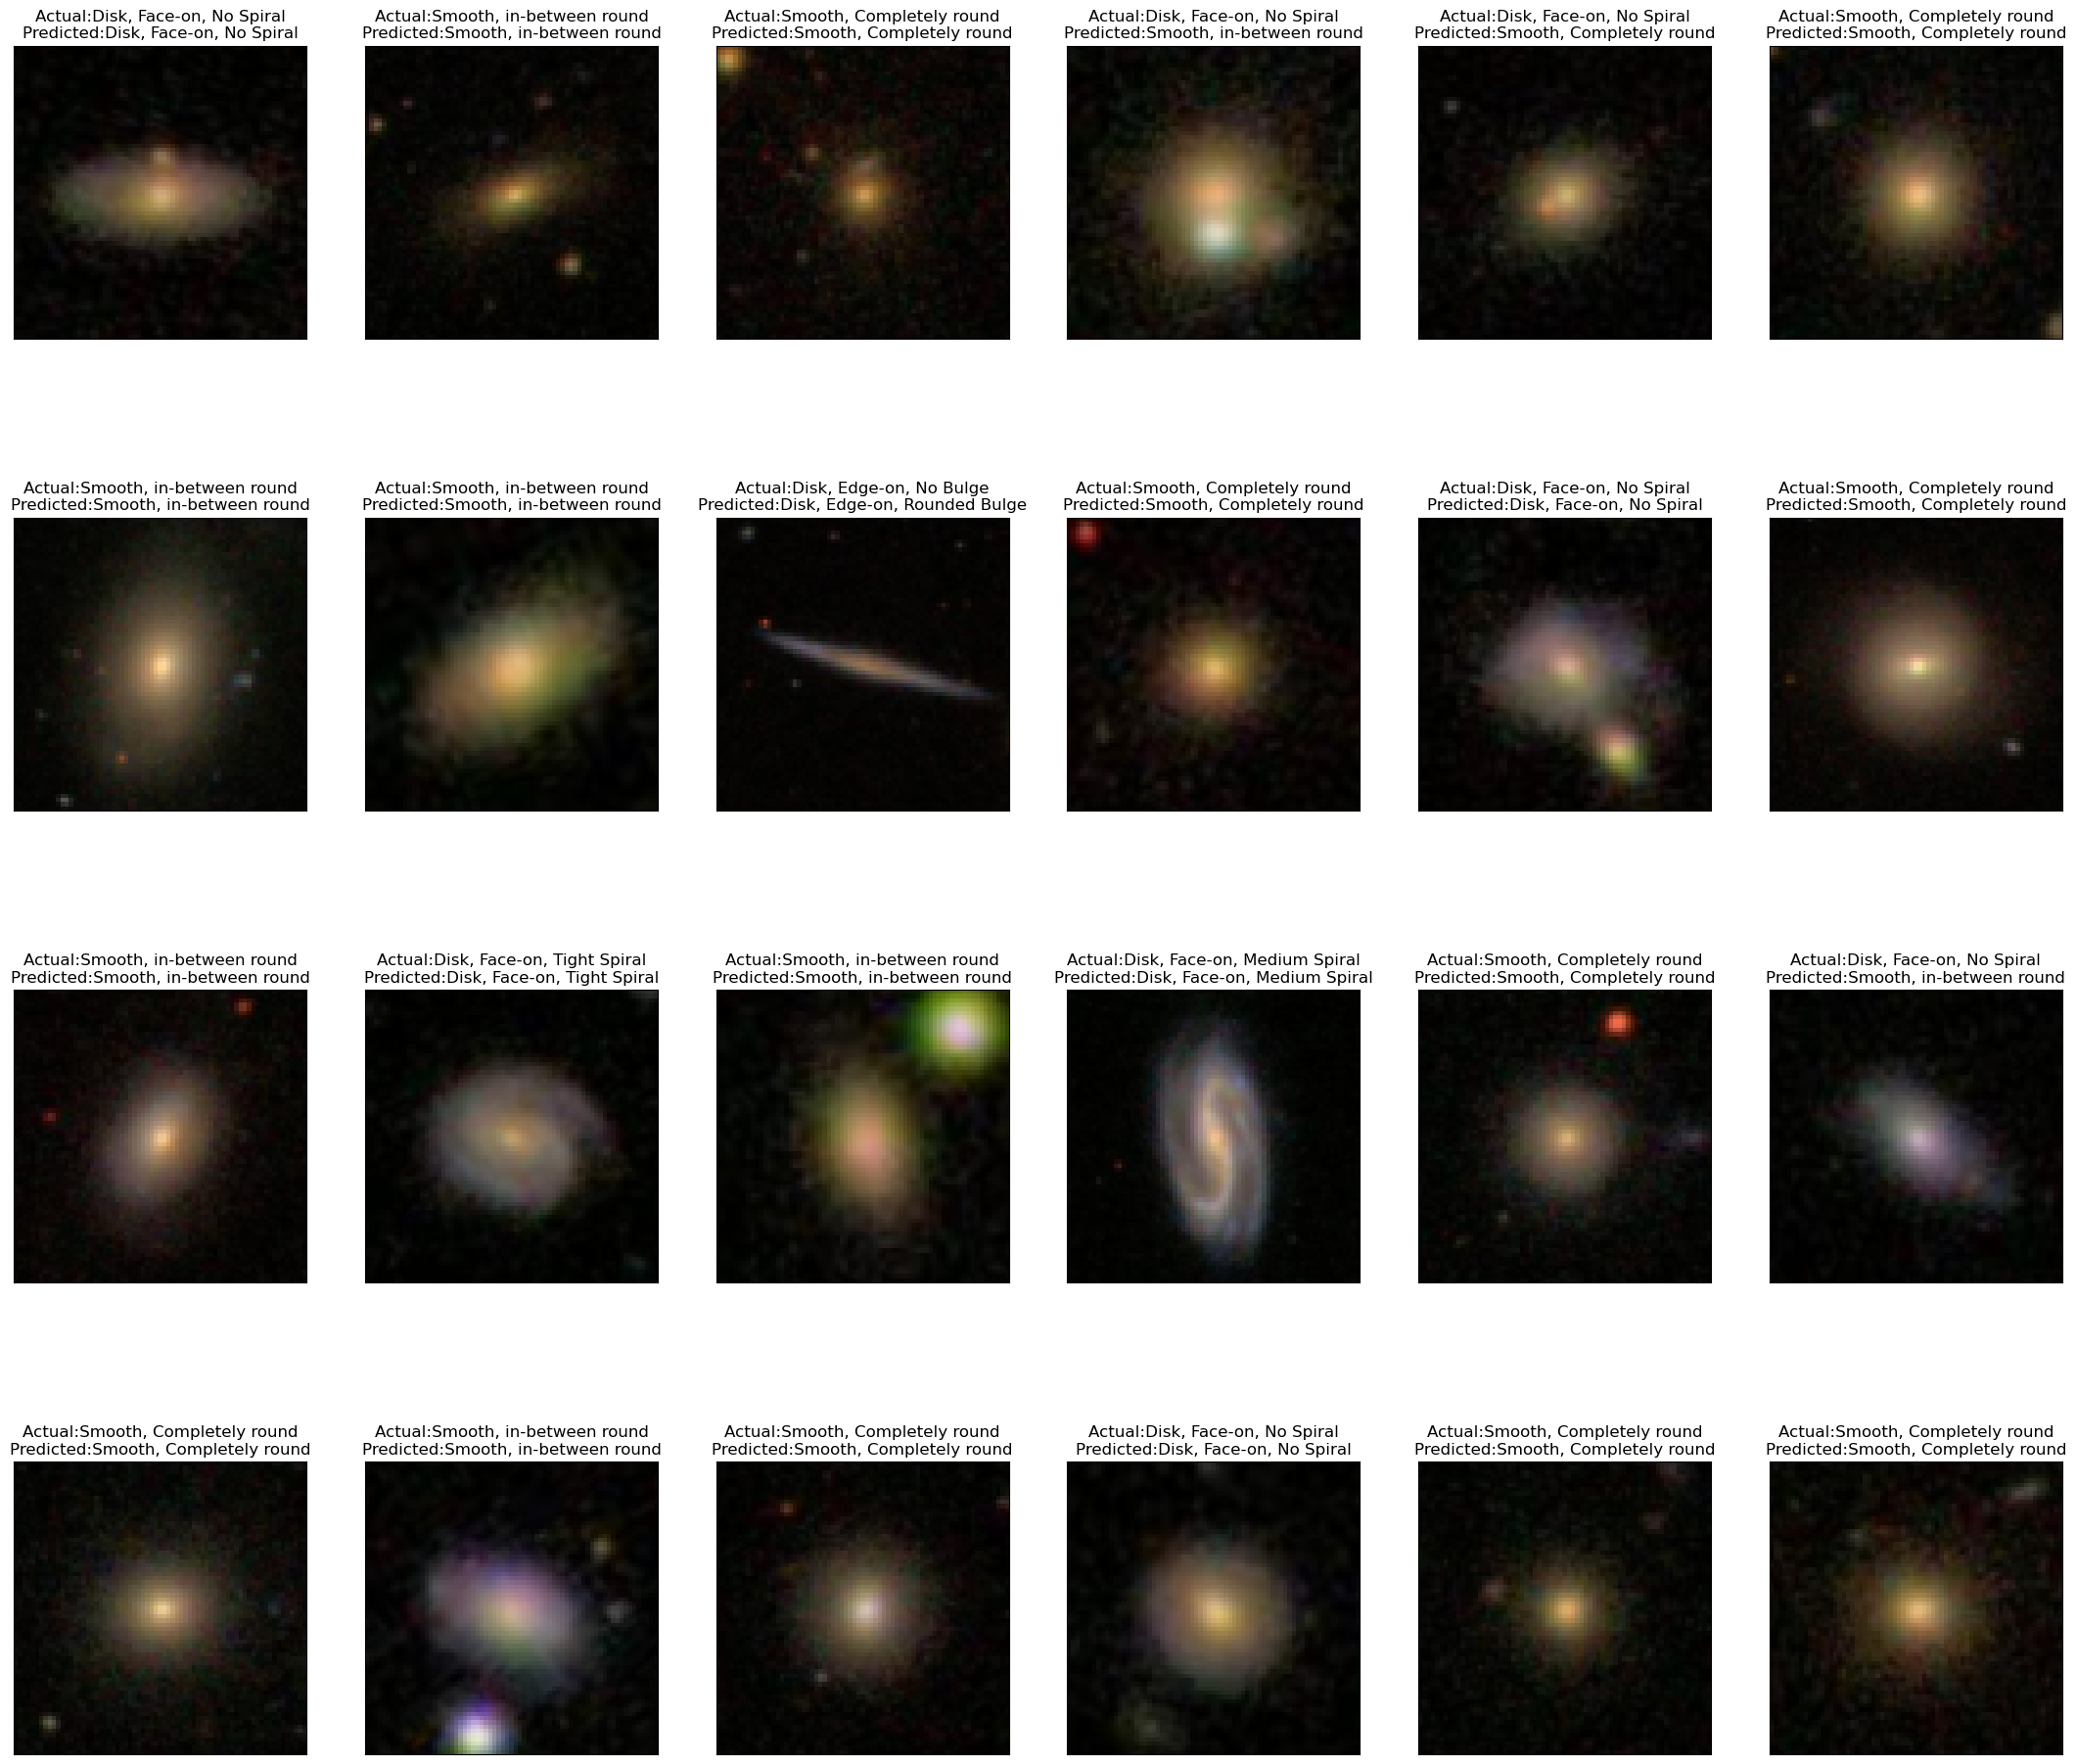

In [23]:
fig, axes = plt.subplots(ncols=6, nrows=4, sharex=False,
    sharey=True, figsize=(27, 24))
index = 0
for i in range(4):
    for j in range(6):
        axes[i,j].set_title('Actual:' + imageLabel[actual_label[index]] + '\n'
                            + 'Predicted:' + imageLabel[pred_label[index]])
        axes[i,j].imshow(test_images[index].astype(np.uint8), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()